In [1]:
import main as m
import homography as h
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
PE = np.array([
    [1000, 55],
    [755, 920],
    [270, 130],
    [20, 1000]
])
margin = 100
PS = np.array([
    [1024-margin, margin],
    [1024-margin, 1024-margin],
    [margin, margin],
    [margin, 1024-margin]
])

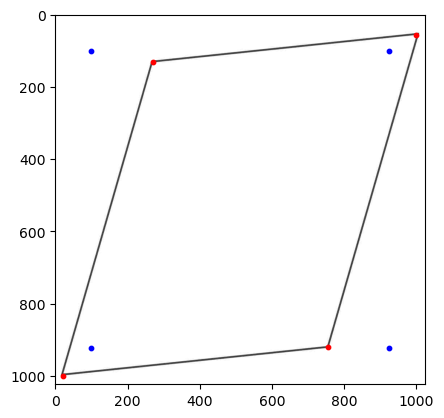

In [3]:
xe, ye = PE.T
xs, ys = PS.T

I = Image.open("images/Affine1.jpg", mode="r").convert('L')
Img = m.Compresser(np.array(I), 1)
plt.imshow(Img, cmap='gray')
plt.scatter(xe, ye, 10, color="red")
plt.scatter(xs, ys, 10, color="blue")
plt.show()

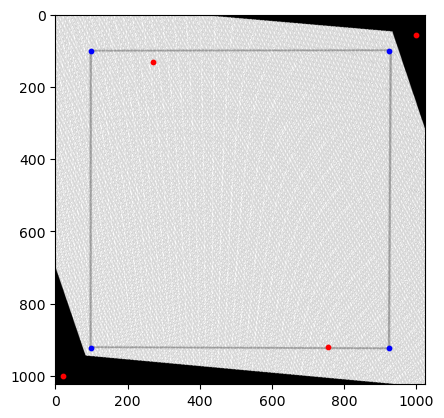

In [4]:
HImage, e_suraffectations = h.TransformationProjective(Img, PE, PS)
plt.imshow(HImage, cmap='gray')
plt.scatter(xe, ye, 10, color="red")
plt.scatter(xs, ys, 10, color="blue")
plt.show()

In [5]:
e_nonaffecte = h.ErrorNonAffected(HImage, [[margin, margin],
                                   [1024-margin, margin],
                                   [margin, 1024-margin],
                                   [1024-margin, 1024-margin]])

In [6]:
print("Pourcentage non-affecté : " + str(e_nonaffecte/(1024-2*margin)**2))

Pourcentage non-affecté : 0.12422383118107268
